# Importing the required libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
#Colecting the data
df1=pd.read_csv("baseball.csv")
df1.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
#Checking the shape of the dataset
df1.shape

(30, 17)

We have 17 Columns and 30 rows.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
#checking the null values in the dataset
df1.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no Null Values present in the dataset

In [6]:
df1.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df1.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
#Checking the correlation in the dataset
corr=df1.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


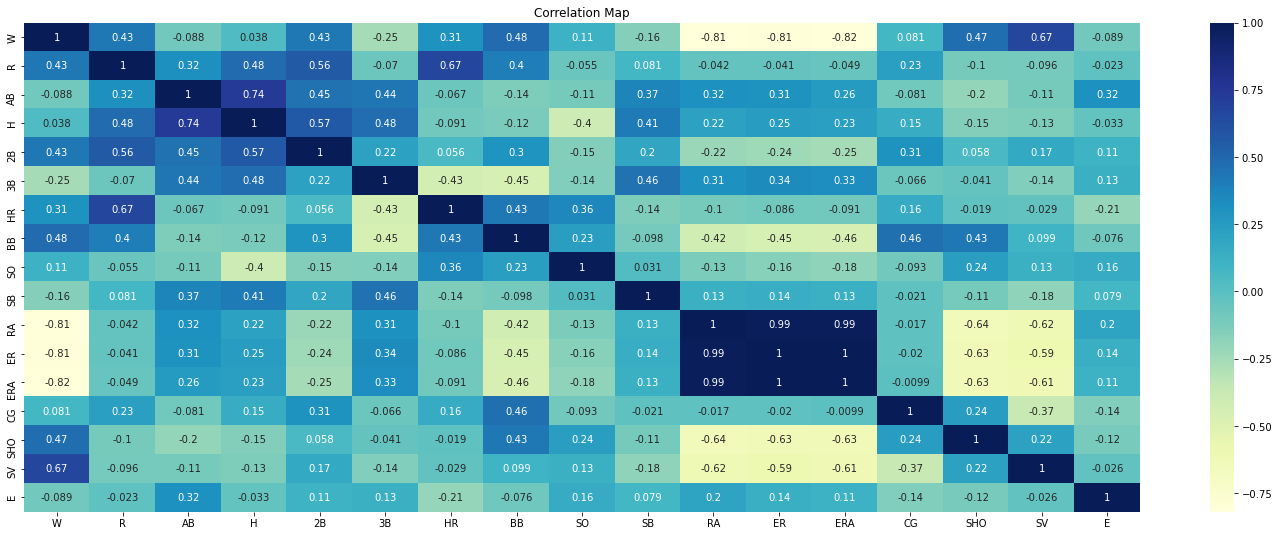

In [9]:
#Correlation Map
plt.figure(figsize=[25,9])
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.title("Correlation Map")
plt.show()

We can observe that columns like "R","2B","BB","SHO", and "SV" are highly correlated with the target column in the range of 45 to 50% which means these columns have very strong impact on the values of the target columns.
Columns like "3B","SO","HR","H",and "CG" are correlated with the target column in the range of 3% to 32% which are nominal and normal.
Others left columns which are not mentioned above are very less correlated with target columns and subsequently have negative values with the target columns.

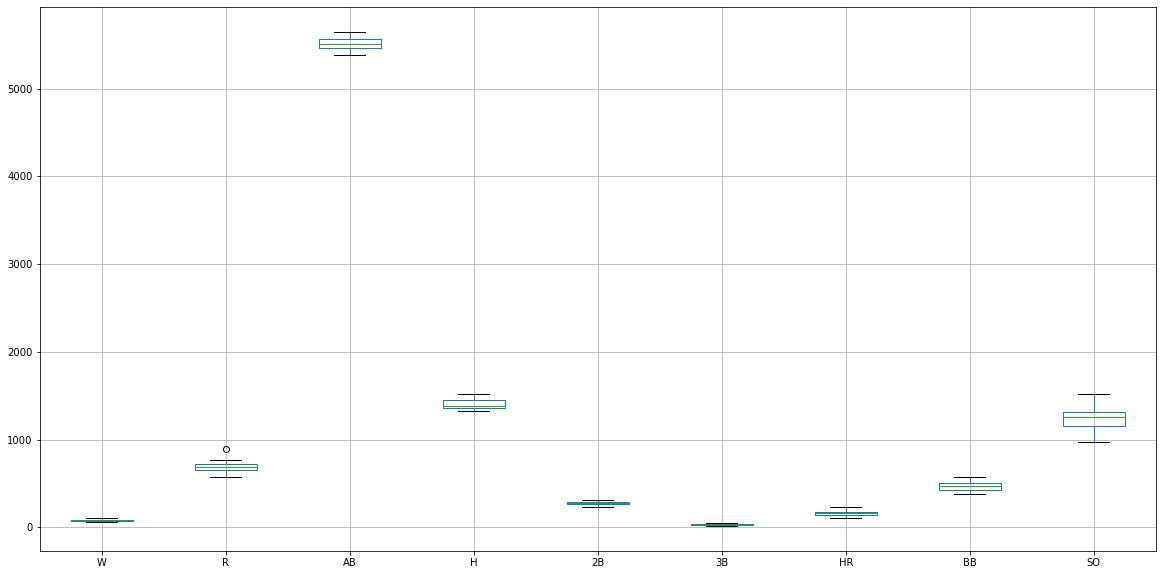

In [10]:
#Cheking the outliers in the dataset
df1.iloc[:,0:9].boxplot(figsize=[20,10])
plt.subplots_adjust()
plt.show()

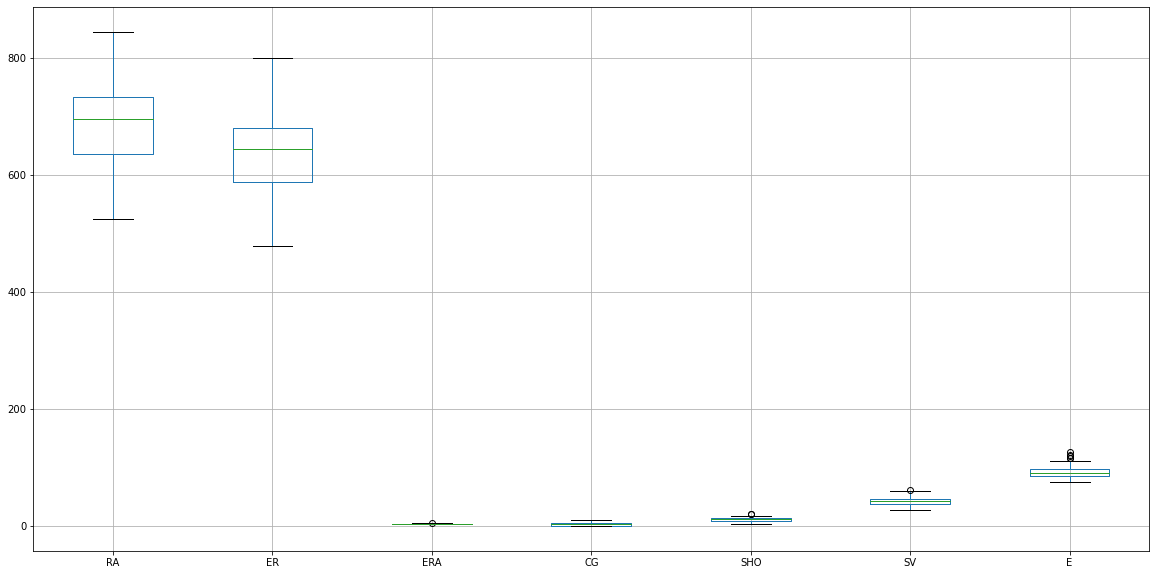

In [11]:
#Checking the outliers for the remaing columns
df1.iloc[:,10:18].boxplot(figsize=[20,10])
plt.subplots_adjust()
plt.show()

In [12]:
#Checking the Skewness in the dataset
df1.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

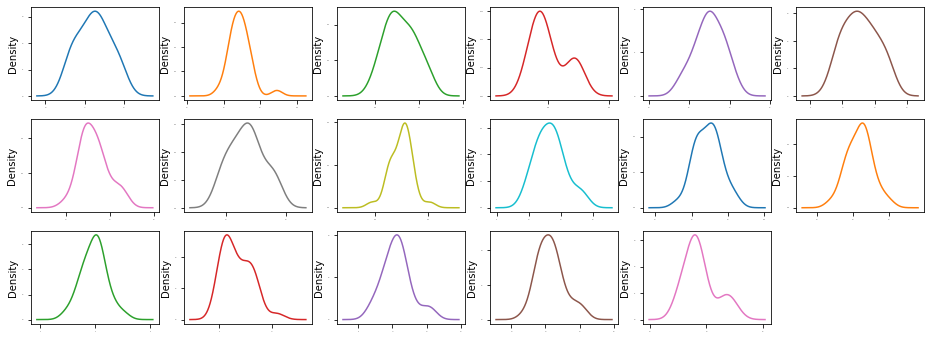

In [13]:

df1.plot(kind="density",subplots=True,layout=(6,6),sharex=False,legend=False,fontsize=1,figsize=[16,12])
plt.show()

In [14]:
#Removing the skewness
df1["R"]=np.log(df1["R"])
df1["CG"]=np.sqrt(df1["CG"])
df1["SV"]=np.sqrt(df1["SV"])
df1["E"]=np.log(df1["E"])

In [15]:
df1.skew()

W      0.047089
R      0.744196
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.311476
SHO    0.565790
SV     0.410288
E      0.630080
dtype: float64

In [16]:
x=df1.drop("W",axis=1)
y=df1["W"]

### Splitting the Data into X and Y

In [17]:
x=df1.drop("W",axis=1)
y=df1["W"]

In [18]:
#Checking the shape of x and y 
print("Shape of X : ",x.shape)
print("Shape of Y : ",y.shape)

Shape of X :  (30, 16)
Shape of Y :  (30,)


In [19]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.584791,5575,1497,300,42,139,383,973,104,641,601,3.73,1.414214,8,7.483315,4.477337
1,6.545350,5467,1349,277,44,156,439,1264,70,700,653,4.07,1.414214,12,6.708204,4.454347
2,6.505784,5439,1395,303,29,141,533,1157,86,640,584,3.67,3.316625,10,6.164414,4.369448
3,6.432940,5533,1381,260,27,136,404,1231,68,701,643,3.98,2.645751,9,6.082763,4.615121
4,6.535241,5605,1515,289,49,151,455,1259,83,803,746,4.64,2.645751,12,5.916080,4.454347


# Machine Learning model training

In [20]:
#importing the necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
#Choosing the best random state for our ML Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,8):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu," on Random State ",maxRS)

Best Accuracy is  0.8855857336001642  on Random State  5


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

## Linear Regression

In [23]:
#taking Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Accuracy score of Linear Regression : ",r2_score(y_test,pred_test))

Accuracy score of Linear Regression :  0.8855857336001642


## Random Forest Regressor

In [24]:
#Taking the randomforest regressor model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_test=rfr.predict(x_test)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))

Accuracy Score for Random Forest Regressor :  0.6447055640946817


## Decision Tree Regressor

In [25]:
#Taking the randomforest regressor model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test=dtr.predict(x_test)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))

Accuracy Score for Random Forest Regressor :  0.1409468183215492


By Comparing all the scores of repective Machine learning model, we can come to the conculsion tha Linear Regression is the best model giving score around 88.55%.
But it can be due to overfiiting and underfiiting. In order to confirm, we will check the cross validation score of each model.

# Cross validation 

In [26]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean1=cv_score.mean()

print("Cross Validation Score for Linear Regressor model: ",cv_mean1)

Cross Validation Score for Linear Regressor model:  -0.05042771449100121


In [27]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfr,x,y,cv=5)
cv_mean1=cv_score.mean()

print("Cross Validation Score for Random Forest Regressor model: ",cv_mean1)

Cross Validation Score for Random Forest Regressor model:  -0.5842980140985435


In [28]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dtr,x,y,cv=5)
cv_mean1=cv_score.mean()

print("Cross Validation Score for Decision Tree Regressor model: ",cv_mean1)

Cross Validation Score for Decision Tree Regressor model:  -1.8969461979723572


Comparing the Scores of the respective Machine lwarning models and cross validation scores, we came to the conclusion as Linear Regressor is the best MAchine Learning model as it has the least diffrence between the respective scores.

In [29]:
from sklearn.model_selection import GridSearchCV

parameters={"copy_X":['True','False'],"fit_intercept":['True','False'],'normalize':['True','False']}

GCV=GridSearchCV(lr,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}

In [30]:
best_mod=LinearRegression(copy_X='True',fit_intercept='True',normalize='True')

best_mod.fit(x_train,y_train)
pred=best_mod.predict(x_test)
print("Best Accuracy Score: ",r2_score(y_test,pred)*100)

Best Accuracy Score:  88.55857336001668


# Saving the Model

In [32]:
import joblib
joblib.dump(best_mod,"Baseball.pkl")

['Baseball.pkl']

In [33]:
# Checking if the model is working
model=joblib.load("Baseball.pkl")
prediction=model.predict(x_test)
print(r2_score(y_test,prediction)*100)

88.55857336001668
